In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

Parameters

In [2]:
u = 10
dx = 8
dz = 0.1
N2 = 1     #constant. N^2 = g * d ln(θ)/dz, where θ is the potential temperature. Relates change in temperature with change in height. Does technically vary with
            #height but is assumed to be constant. Square of the buoancy frequency.
xlen = 1000 #meters
zlen = 250 # meters

#Setting up the ground
def ground(x):
    ans = 10 * np.sin((np.pi * x) / 250) + 10
    return ans
# Setting up the slope of the ground
def slope(y):
    der =  np.pi  * np.cos((np.pi * y) / 250) / 25
    return der
nx = int(xlen / dx) + 1
nz = int(zlen / dz) 

xpos = np.arange(0, xlen + 1, dx)
zpos = np.arange(0, zlen + dz, dz)

Setting up vectors

In [3]:
initial_w = u * slope(xpos)
solution = np.zeros([nx, nz])
solution[:,0] = initial_w
solution[:,1] = initial_w * .95
print(solution)
print(initial_w)

[[1.25663706 1.19380521 0.         ... 0.         0.         0.        ]
 [1.25029232 1.18777771 0.         ... 0.         0.         0.        ]
 [1.23132217 1.16975606 0.         ... 0.         0.         0.        ]
 ...
 [1.23132217 1.16975606 0.         ... 0.         0.         0.        ]
 [1.25029232 1.18777771 0.         ... 0.         0.         0.        ]
 [1.25663706 1.19380521 0.         ... 0.         0.         0.        ]]
[ 1.25663706  1.25029232  1.23132217  1.19991818  1.15639744  1.10119945
  1.03488158  0.95811352  0.87167045  0.77642529  0.67333981  0.56345497
  0.44788038  0.3277831   0.20437589  0.07890489 -0.04736288 -0.17315239
 -0.2971934  -0.41823337 -0.53505004 -0.64646378 -0.75134956 -0.84864824
 -0.93737729 -1.01664074 -1.08563818 -1.14367289 -1.19015883 -1.22462659
 -1.2467281  -1.2562402  -1.25306683 -1.23724003 -1.20891963 -1.16839159
 -1.11606518 -1.05246878 -0.97824458 -0.8941421  -0.80101061 -0.69979054
 -0.59150401 -0.47724449 -0.35816577 -0.23547

In [4]:
from scipy.sparse import spdiags

Making Matrices

In [5]:
c1 = (-dz ** 2) / (dx ** 2)
c2 = 2 + 2 * ((dz ** 2) / (dx ** 2)) - (N2 / u) * dz ** 2
mat = np.array([c1 * np.ones(nx), c2 * np.ones(nx), c1 * np.ones(nx)])
diags = np.array([-1,0,1])
M = spdiags(mat, diags, nx, nx).toarray()

Boundary Conditions

In [6]:
M[0,0] = 1
M[0,1] = 0 

M[-1,-1] = 1 
M[-1,-2] = 0 

Looping

In [7]:
for k in np.arange(nz-2):
    solution[:,k+2] = np.matmul(M,solution[:,k+1]) - solution[:,k]

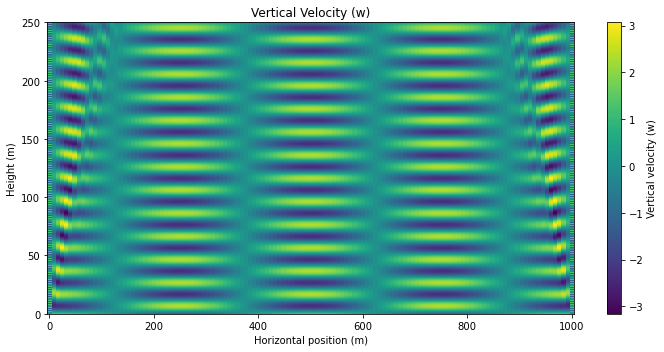

In [8]:
z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_domain, z_domain, solution.T, cmap='viridis')
plt.colorbar(label="Vertical velocity (w)")
plt.xlabel("Horizontal position (m)")
plt.ylabel("Height (m)")
plt.title("Vertical Velocity (w)")
plt.tight_layout()
plt.show()

In [9]:
print(solution)

[[ 1.25663706  1.19380521 -0.06283185 ...  1.19380521 -0.06283185
  -1.25663706]
 [ 1.25029232  1.18777771  1.12407719 ... -0.45995367 -0.45150431
  -0.4425992 ]
 [ 1.23132217  1.16975606  1.10702205 ... -0.8861595  -0.86732703
  -0.84763857]
 ...
 [ 1.23132217  1.16975606  1.10702205 ... -0.8861595  -0.86732703
  -0.84763857]
 [ 1.25029232  1.18777771  1.12407719 ... -0.45995367 -0.45150431
  -0.4425992 ]
 [ 1.25663706  1.19380521 -0.06283185 ...  1.19380521 -0.06283185
  -1.25663706]]


In [10]:
ground_pos = ground(xpos)

In [11]:
print(zpos)

[0.000e+00 1.000e-01 2.000e-01 ... 2.498e+02 2.499e+02 2.500e+02]


In [12]:
tsol = solution.transpose()
l,w = np.shape(tsol)

In [13]:
print(l,w)

2500 126


In [14]:
newl = l + 1000
altarr = np.full((newl, w),np.nan)
print(np.shape(altarr))

(3500, 126)


In [15]:
for i in np.arange(0,len(ground_pos) - 1):
    shift = np.round(ground_pos[i] / dz).astype(int)
    altarr[shift:shift + l,i] = tsol[:,i]
    

altitudearr= altarr[~np.isnan(altarr).all(axis=1)]
newsize, var1 = np.shape(altitudearr)
print(newsize)
newlenz = newsize * dz
print(newlenz)
nz1 = int(newlenz / dz) 
newz = np.linspace(0,newlenz,nz1)

2700
270.0


NameError: name 'c' is not defined

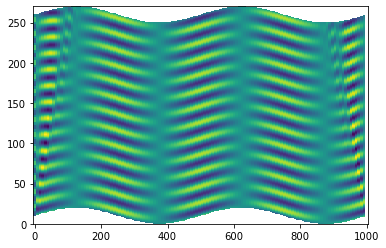

In [16]:

fig, ax = plt.subplots()

vertical_vel = ax.pcolormesh(x_domain, newz, altitudearr, cmap='viridis', shading='auto')
fig.colorbar(c, ax=ax, label="Vertical velocity (w)")

ax.plot(x_domain, ground_pos, color='red', label='Ground position')
ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Vertical Velocity (w)")
ax.legend()

plt.tight_layout()
plt.show()

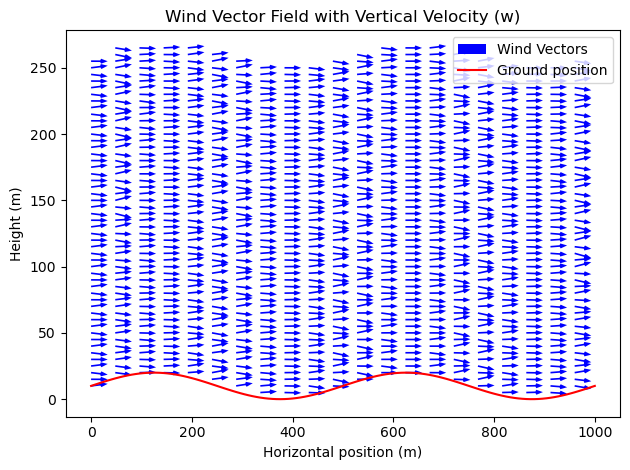

In [1593]:
# Create the figure and axis
fig, ax = plt.subplots()

# Create the wind vectors (horizontal component = 10, vertical component = w from altitudearr)
u = 10 * np.ones_like(altitudearr)  # Horizontal velocity component (constant 10)
v = altitudearr  # Vertical velocity component (from altitudearr)

# Separate skip factors for x and z dimensions
skip_x = 6  # Downsampling factor for x (horizontal dimension)
skip_z = 50  # Downsampling factor for z (vertical dimension)

# Apply separate skip factors
x_skip = x_domain[::skip_x]
z_skip = newz[::skip_z]

# Use np.meshgrid to create a grid of coordinates
X, Z = np.meshgrid(x_skip, z_skip)

# Get the corresponding velocity components for the downsampled points
U = u[::skip_z, ::skip_x]  # Skip in both dimensions for velocity components
V = v[::skip_z, ::skip_x]

# Plot the vector field with ax.quiver
# To reduce vector length, scale them down further
scaling_factor = 0.003  # Adjust this value to reduce the vector length as needed
U = U * scaling_factor
V = V * scaling_factor
ax.quiver(X, Z, U, V, scale=1, color='blue', headlength=4, width=0.003, label = 'Wind Vectors')

# Add labels, title, and legend
ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Wind Vector Field with Vertical Velocity (w)")
ax.plot(x_domain, ground_pos, color='red', label='Ground position')
plt.legend()
# Final layout and show
plt.tight_layout()
plt.show()